In [134]:
import pandas as pd
import docx
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
# pip install python-docx

In [135]:
DATE = 'Feb12_2024'
pd_lowess_ch = pd.read_csv(f'lowess_fit_cluster3__rel_2020_101yr__lowess_added_quantiles_added_clusters_normalised{DATE}.csv')
fill_option = 'repeat_last_101yrs' 
fit_to_median = False
path_merged_runs_scaled_extend = f'/home/www/lschuster/glacierMIP3_analysis/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}.nc'
ds_reg_models = xr.open_dataset(path_merged_runs_scaled_extend)
from help_functions import pal_models, model_order, d_reg_num_name, model_order_anonymous, compute_steady_state_yr
hue_order_anonymous = []

pal_models_l = []
hue_order = []
for m, p in zip(model_order, pal_models):
    if (m!='OGGM-VAS') and (m!='OGGM_v153') and (m!='Huss'):
        hue_order.append(m)
ds_reg_models = ds_reg_models.sel(model_author = hue_order)


In [136]:
df_reg_models_count_models = ds_reg_models.volume_m3.isel(simulation_year=0).to_dataframe()

In [137]:
df_reg_models_count_models = (df_reg_models_count_models.reset_index().dropna().groupby('rgi_reg').count()/80)['model_author']
reg_w_only_glob_models = df_reg_models_count_models.loc[df_reg_models_count_models.values == 4].index
reg_w_5_models = df_reg_models_count_models.loc[df_reg_models_count_models.values == 5].index
reg_w_6_models = df_reg_models_count_models.loc[df_reg_models_count_models.values == 6].index


In [138]:
perc_rel_2020_glob_models = 100*df.loc[reg_w_only_glob_models].sum()['regional_volume_m3_2020_via_5yravg'] /df.loc['All','regional_volume_m3_2020_via_5yravg']
perc_rel_2020_5_models = 100*df.loc[reg_w_5_models].sum()['regional_volume_m3_2020_via_5yravg'] /df.loc['All','regional_volume_m3_2020_via_5yravg']
perc_rel_2020_6_models = 100*df.loc[reg_w_6_models].sum()['regional_volume_m3_2020_via_5yravg'] /df.loc['All','regional_volume_m3_2020_via_5yravg']


Text(0, 0.5, 'Modelled glacier volume (% rel. to global ice in 2020)')

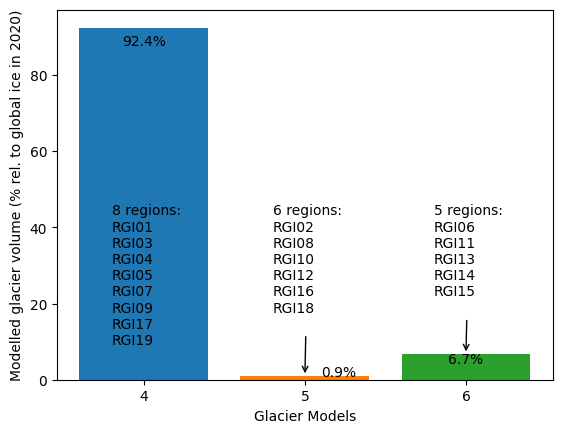

In [189]:
plt.bar(4, perc_rel_2020_glob_models)
reg_w_only_glob_models_str =  f'{len(reg_w_only_glob_models)} regions:\n'
for r in reg_w_only_glob_models:
    reg_w_only_glob_models_str += f'RGI{r}\n'
plt.annotate(reg_w_only_glob_models_str, (3.8, perc_rel_2020_glob_models*0.5),
            verticalalignment = 'top')
plt.text(4, perc_rel_2020_glob_models*0.95,f'{perc_rel_2020_glob_models.round(1)}%', horizontalalignment='center')



plt.bar(5, perc_rel_2020_5_models)
reg_w_5_models_str = f'{len(reg_w_5_models)} regions:\n'
for r in reg_w_5_models:
    reg_w_5_models_str += f'RGI{r}\n'
plt.annotate(reg_w_5_models_str, xytext=(4.8, perc_rel_2020_glob_models*0.5),
             xy=(5, perc_rel_2020_5_models),
             arrowprops={'arrowstyle' :'->'},
            verticalalignment = 'top')
plt.text(5.1, perc_rel_2020_5_models*1.1,f'{perc_rel_2020_5_models.round(1)}%')

plt.bar(6, perc_rel_2020_6_models)
reg_w_6_models_str = f'{len(reg_w_6_models)} regions:\n'
for r in reg_w_6_models:
    reg_w_6_models_str += f'RGI{r}\n'
plt.annotate(reg_w_6_models_str, xytext=(5.8, perc_rel_2020_glob_models*0.5),
             xy=(6, perc_rel_2020_6_models),
             arrowprops={'arrowstyle' :'->'},
            verticalalignment = 'top')
plt.text(6, perc_rel_2020_6_models*0.65,f'{perc_rel_2020_6_models.round(1)}%', horizontalalignment='center')

plt.xticks([4,5,6])
plt.xlabel('Glacier Models')
plt.ylabel('Modelled glacier volume (% rel. to global ice in 2020)')

In [116]:
df['regional_volume_m3_2020_via_5yravg']/df.loc['All','regional_volume_m3_2020_via_5yravg']

All    1.000000
01     0.118157
02     0.005783
03     0.180746
04     0.052456
05     0.097531
06     0.023233
07     0.047753
08     0.001727
09     0.094295
10     0.000794
11     0.000617
12     0.000312
13     0.020151
14     0.018075
15     0.004773
16     0.000500
17     0.031767
18     0.000382
19     0.300945
Name: regional_volume_m3_2020_via_5yravg, dtype: float64

In [13]:
#'regional_volume_m3_itmix_vs_2020',
# 'regional_dvol_dt_2000_2019_vs_2020_vol',
       #'kmeans_cluster_3_rel_2020'
                    #'yr_diff_rgi_vs_2020', 
#'mean_len_ten_largest_glac',
        #'rgi_year_weighted_median',
       #  'elev_diff_to_med_area_weighted', don not use that because we don't have that for RGI19 !!!
#'lat_weighted_area_avg', 
#'geodetic_obs_area_weighted',
#'lat_weighted_area_avg', 
        #'slope_weighted_vol_avg',
#'temp_avg_1981-2000', 
#         'prcp_avg_1981-2000',
#'continentality_index_avg_1981-2000',
       # 'temp_avg_1995-2014',
#'prcp_avg_1995-2014',
        #'continentality_index_avg_1995-2014',
#'temp_ch_avg_1986-2005_vs_1901-1920',
#'temp_ch_avg_1995-2014_vs_1901-1920', 
approach = '_via_5yravg'
columns_sel3_d = {
    #'rgi_reg': 'rgi_reg',
    #'region': 'region',
    ####### climate indices 
    'temp_ch_avg_2000-2019_vs_1901-1920': 'ΔTemp 2000-2019 - 1901-1920 (reg-aw)',
    'temp_avg_2000-2019': 'Temp 2000-2019 (reg-aw)',
    'prcp_avg_2000-2019': 'Prcp 2000-2019 (reg-aw)',
    'continentality_index_avg_2000-2019': 'Continentality index 2000-2019 (reg-aw)',
    #'median_reg_vs_glob_ch': '',
    #'median_reg_vs_glob_temp_ch_above_zero_eight_deg': ,
    #'median_reg_vs_glob_temp_ch_0.8_1.5': '',
    'median_reg_vs_glob_temp_ch_1.5_3.0': 'Ratio reg vs global ΔTemp (median, reg-aw)',
    'median_reg_vs_glob_temp_ch_1.5_3.0': 'Ratio reg vs global ΔTemp (1.5-3.0°C, median, reg-aw)',
    #'slope_fit_reg_vs_glob_ch': 'Fitted slope regional vs global temp change (aw)',
    
    ##### glacier topography ... 
    'slope_weighted_area_avg': 'Glacier surface slope (reg-aw)',
    'lat_absolute_weighted_area_avg': 'Latitude (absolute, reg-aw)',
    'mean_vol_ten_largest_glac': 'Mean volume (10 largest)',
    'mean_area_ten_largest_glac': 'Mean area (10 largest)',
    'elev_diff_area_weighted': 'Elevation difference (reg-aw)',
    'max_elev_area_weighted': 'Maximum elevation (reg-aw)',
    'min_elev_area_weighted': 'Minimum elevation (reg-aw)',
    'ice_cap_ratio_hundredlargest_glac': 'Ratio ice caps (100 largest)',
    'marine_term_ratio_hundredlargest_glac': 'Ratio marine-terminating (100 largest)',
    #'regional_volume_m3_itmix': 'Reg volume (inventory date)',
    f'regional_volume_m3_2020{approach}': 'Reg volume (2020)',

    # glacier changes in the past
    'dvoldt_m3_hugonnet': '20-year reg ΔVolΔt 2000-2019 (Hugonnet, 2021)',
    '20yr_regional_dvol_dt_2000_2019_vs_2000_vol_%': '20-year reg ΔVolΔt 2000-2019 rel. to 2000 Vol',
    #'20yr_regional_dvol_dt_2000_2019_vs_farinotti_vol_%': '20-year reg dVoldt 2000-2019 rel. to Volume inventory date',
    
    # glacier simulation changes from GMIP3 
    'resp_time_-50%_1_5_deg': 'Time to reach 50% of changes (~1.5°C, reg)',
    'resp_time_-50%_3_0_deg': 'Time to reach 50% of changes (~3.0°C, reg)',
    'resp_time_-80%_1_5_deg': 'Time to reach 80% of changes (~1.5°C, reg)',
    'resp_time_-80%_3_0_deg': 'Time to reach 80% of changes (~3.0°C, reg)',
    'ice_loss_1.2°C_%_rel_2020': 'Committed ice loss (1.2°C, reg, %, rel. 2020)',
    'ice_loss_slope_between_1.5_and_3.0_per_degC_rel_2020': 'Ice loss temp sensitivity (1.5-3.0°C, reg, rel. 2020)'
}
columns_sel3 = columns_sel3_d.keys()

df = pd.read_csv(f'3_shift_summary_region_characteristics{DATE}.csv', index_col=[0])


In [14]:
from oggm import utils

df_rgi6g = pd.read_hdf(utils.file_downloader('https://cluster.klima.uni-bremen.de/~oggm/rgi/rgi62_stats.h5'))
df_rgi6g = df_rgi6g.loc[df_rgi6g.Connect != 2]
for rgi_reg in df_rgi6g.O1Region.unique():
    rgidf = df_rgi6g.loc[df_rgi6g.O1Region == rgi_reg]
    df.loc[rgi_reg, 'RGI v6.0 area (km²)'] = rgidf['Area'].sum()
df.loc['All', 'RGI v6.0 area (km²)'] = df_rgi6g['Area'].sum()

In [15]:
rgi_regs_5000 = ['01', '03', '04', '05', '06','07', '09', '17','19']
df['Simulation time'] = str(2000)
df.loc['All', 'Simulation time'] = ''
for r in rgi_regs_5000:
    df.loc[r,'Simulation time'] = str(5000)

In [16]:
cols_s4 = ['Simulation time', 'rgi_year_weighted_median','RGI v6.0 area (km²)','regional_volume_m3_itmix',
           'regional_volume_m3_2020_via_5yravg', '20yr_regional_dvol_dt_2000_2019_vs_2020_vol_%', 'slope_weighted_area_avg']
df_s4 = df[cols_s4]
df_s4.loc[:, 'slope_weighted_area_avg'] = df_s4['slope_weighted_area_avg'].round(1) # do not show NaN

df_s4.loc['All', 'slope_weighted_area_avg'] = '' # do not show NaN

df_s4.loc[:,'RGI v6.0 area (km²)'] = df_s4['RGI v6.0 area (km²)'].round(0).astype(int)
df_s4.loc[:,'rgi_year_weighted_median'] = df_s4['rgi_year_weighted_median'].round(0).astype(int)
df_s4.loc[:,'regional_volume_m3_itmix'] = (df_s4['regional_volume_m3_itmix']/1e9).round(0).astype(int) # km3
df_s4.loc[:,'regional_volume_m3_2020_via_5yravg'] = (df_s4['regional_volume_m3_2020_via_5yravg']/1e9).round(0).astype(int) # km3

df_s4.loc[:,'20yr_regional_dvol_dt_2000_2019_vs_2020_vol_%'] = df_s4['20yr_regional_dvol_dt_2000_2019_vs_2020_vol_%'].round(1)

/tmp/ipykernel_305401/4238556700.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s4.loc[:, 'slope_weighted_area_avg'] = df_s4['slope_weighted_area_avg'].round(1) # do not show NaN
/tmp/ipykernel_305401/4238556700.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s4.loc['All', 'slope_weighted_area_avg'] = '' # do not show NaN
/tmp/ipykernel_305401/4238556700.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [17]:
rename_cols = {'Simulation time':'Simulation _time (2000_or 5000)',
               'rgi_year_weighted_median': 'RGI date _(glacier-area _weighted median)',
               'RGI v6.0 area (km²)':'RGI v6.0 _area _(km²)_',
              'regional_volume_m3_itmix':'RGI date volume _consensus estimate _(km³)',
              'regional_volume_m3_2020_via_5yravg':'2020 volume _estimate _(km³)',
              '20yr_regional_dvol_dt_2000_2019_vs_2020_vol_%': '2000-2019 _volume changes _% rel. to 2000 Vol',
              'slope_weighted_area_avg':'Glacier surface _slope (glacier-area _weighted, in °)'}
df_s4 = df_s4.rename(columns=rename_cols)
# Transpose the DataFrame
df_s4 = df_s4.T

# Splitting long column names into multiple rows
df_s4.index = df_s4.index.str.split('_').map(tuple)
df_s4 = df_s4.T

In [18]:
df_s4

,Simulation,RGI date,RGI v6.0,RGI date volume,2020 volume,2000-2019,Glacier surface
,time (2000,(glacier-area,area,consensus estimate,estimate,volume changes,slope (glacier-area
,or 5000),weighted median),(km²),(km³),(km³),% rel. to 2000 Vol,"weighted, in °)"
All,,2000,705739,158157,152767,4.1,
01,5000,2010,86725,18978,18051,8.7,13.9
02,2000,2004,14524,1047,883,20.1,18.3
03,5000,1999,105111,28331,27612,2.6,9.6
04,5000,2001,40888,8611,8014,7.8,11.5
05,5000,2001,89717,15692,14899,5.6,10.3
06,5000,2000,11060,3770,3549,6.2,6.7
07,5000,2008,33959,7470,7295,3.4,8.8


In [19]:
df_word = df_s4.copy()
df_word.index.name = 'Region'
# open an existing document
doc = docx.Document() 

# add a table to the end and create a reference variable
# extra row is so we can add the header row
t = doc.add_table(df_word.shape[0]+1, df_word.shape[1])

# add the header rows.
for j in range(df_word.shape[-1]):
    t.cell(0,j).text = df_word.columns[j]

# add the rest of the data frame
for i in range(df_word.shape[0]):
    for j in range(df_word.shape[-1]):
        t.cell(i+1,j).text = str(df_word.values[i,j])
        
# add index names
t.cell(0, 0).text = df_word.index.name
for i in range(df_word.shape[0]):
    t.cell(i+1, 0).text = df_word.index[i]
# save the doc
doc.save('data/table_s4.docx')


### Steady-states estimates with uncertainties ... 

In [41]:
pd_fit_over_glob = pd.read_csv('lowess_fits/fitted_lowess_best_frac_shift_years_rel_2020_101yr_avg_period_lowess_added_quantiles_added_fit_over_global_estimates_current12deg_5000_Feb12_2024_only_global_models.csv')
pd_fit_over_glob = pd_fit_over_glob.where(np.isnan(pd_fit_over_glob.y)).dropna(how='all')
pd_fit_over_glob = pd_fit_over_glob.loc[pd_fit_over_glob.region == 'All']
pd_fit_over_glob.region = 'All_g*'

# global fit is done over medians over global stuff
# quantiles estimated the same as for 'All', but just showing the four glacier models 
pd_fit_only_glob_med_glob =pd.read_csv('lowess_fits/fitted_lowess_best_frac_shift_years_rel_2020_101yr_avg_period_lowess_added_quantiles_added_current12deg_5000_Feb12_2024_only_global_models.csv')
pd_fit_only_glob_med_glob = pd_fit_only_glob_med_glob.where(np.isnan(pd_fit_only_glob_med_glob.y)).dropna(how='all')
pd_fit_only_glob_med_glob.loc[pd_fit_only_glob_med_glob.region == 'All','region'] = 'All_g_ms'
#pd_fit_only_glob_med_glob.region = 

In [42]:
pd_fit_only_glob_med_glob#.loc[pd_fit_only_glob_med_glob.region == 'All_g_ms']#['0.5'].values

,x,0.05,0.25,0.5,0.75,0.95,frac,region,year,fit_to_median,...,fit_opt,shift_years_2020,y,add,min_0.5_diff,min_0.5,min_0.5_diff_above_zero,median_absolute_deviation,rmse,algorithm_sel
1,-2.000000e-01,97.818303,102.614918,108.864701,109.871393,109.765333,0.42,All_g_ms,5000.0,False,...,lowess_fit,True,NaN,NaN,0.156270,2.585389,0.156270,3.045938,4.318879,non_negative_and_decreasing
3,-1.500000e-01,95.579096,100.556551,106.631217,107.778291,108.403561,0.42,All_g_ms,5000.0,False,...,lowess_fit,True,NaN,NaN,0.156270,2.585389,0.156270,3.045938,4.318879,non_negative_and_decreasing
4,-1.000000e-01,93.391473,98.513102,104.410616,105.680276,107.052749,0.42,All_g_ms,5000.0,False,...,lowess_fit,True,NaN,NaN,0.156270,2.585389,0.156270,3.045938,4.318879,non_negative_and_decreasing
5,-5.000000e-02,91.256586,96.492117,102.204600,103.584236,105.706623,0.42,All_g_ms,5000.0,False,...,lowess_fit,True,NaN,NaN,0.156270,2.585389,0.156270,3.045938,4.318879,non_negative_and_decreasing
6,-5.551115e-17,89.173681,94.499457,100.011696,101.494048,104.343628,0.42,All_g_ms,5000.0,False,...,lowess_fit,True,NaN,NaN,0.156270,2.585389,0.156270,3.045938,4.318879,non_negative_and_decreasing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,6.600000e+00,1.604803,3.061168,9.643128,14.660612,22.167826,0.62,19,5000.0,False,...,lowess_fit,True,NaN,NaN,0.215865,8.671891,0.215865,13.378027,31.712857,non_negative_and_decreasing
8972,6.650000e+00,1.535594,2.918242,9.425816,14.267100,21.470449,0.62,19,5000.0,False,...,lowess_fit,True,NaN,NaN,0.215865,8.671891,0.215865,13.378027,31.712857,non_negative_and_decreasing
8973,6.700000e+00,1.466129,2.775939,9.209076,13.872857,20.772902,0.62,19,5000.0,False,...,lowess_fit,True,NaN,NaN,0.215865,8.671891,0.215865,13.378027,31.712857,non_negative_and_decreasing
8974,6.750000e+00,1.396356,2.634376,8.992820,13.477857,20.074275,0.62,19,5000.0,False,...,lowess_fit,True,NaN,NaN,0.215865,8.671891,0.215865,13.378027,31.712857,non_negative_and_decreasing


In [57]:
sim_year = 5000
qs = [0.05,0.25,0.5,0.75,0.95]

pd_sel = pd.read_csv(f'lowess_fits/fitted_lowess_best_frac_shift_years_rel_2020_101yr_avg_period_lowess_added_quantiles_added_current12deg_5000_Feb12_2024.csv', index_col=[0])
# only select the values in a 0.05 temp. grid:
pd_sel = pd_sel.where(np.isnan(pd_sel.y)).dropna(how='all')
assert pd_sel.year.unique() == sim_year
# aggregate regional quantiles to get global quantile estimate 
# for the median, we do the fit directly using the individual median fits 
pd_vol_2020 = pd.read_csv(f'rgi_vs_2020_volume_hugonnet_estimates{DATE}.csv', index_col=[0])
pd_sel['vol_2020_reg_m3'] = np.NaN
for rgi_reg in pd_sel.region.unique():
    if rgi_reg == 'All':
        _rgi_reg = 'Globally'
    else:
        _rgi_reg = rgi_reg
    vol_2020 = pd_vol_2020.loc[_rgi_reg, f'regional_volume_m3_2020{approach}']
    pd_sel.loc[pd_sel.region == rgi_reg, 'vol_2020_reg_m3'] = vol_2020
    pd_fit_over_glob.loc[pd_fit_over_glob.region== rgi_reg, 'vol_2020_reg_m3'] = vol_2020
    pd_fit_only_glob_med_glob.loc[pd_fit_only_glob_med_glob.region== rgi_reg, 'vol_2020_reg_m3'] = vol_2020
for q in qs:
    q = str(q)
    pd_sel[f'{q}_m3'] = pd_sel[f'{q}'] * pd_sel['vol_2020_reg_m3'] /100
    pd_fit_only_glob_med_glob[f'{q}_m3'] = pd_fit_only_glob_med_glob[f'{q}'] * pd_fit_only_glob_med_glob['vol_2020_reg_m3'] /100

global_vol_2020_m3 = pd_vol_2020.loc['Globally',f'regional_volume_m3_2020{approach}']

    
####### global estimate from all glacier models 
pd_sel_q_glob = pd_sel.loc[pd_sel.region != 'All'].reset_index()
pd_sel_global_sum_over_reg_fitted_quantiles = 100*pd_sel_q_glob[['x','0.05_m3', '0.25_m3', #'0.5_m3',
       '0.75_m3', '0.95_m3']].groupby('x').sum()/global_vol_2020_m3
pd_sel_global_sum_over_reg_fitted_quantiles = pd_sel_global_sum_over_reg_fitted_quantiles.rename(columns = {'0.05_m3':'0.05', 
                                                                                                            '0.25_m3':'0.25',
                                                                                                            '0.75_m3':'0.75',
                                                                                                            '0.95_m3':'0.95'})
# the 0.5 median estimate should come from the actual global fit over the sum of the medians
pd_sel_global_sum_over_reg_fitted_quantiles['0.5'] = pd_sel.loc[pd_sel.region == 'All']['0.5'].values
pd_fit_quantiles_reg_sum_global = pd_sel_global_sum_over_reg_fitted_quantiles.copy().reset_index()

####### global estimate from just the four glacier models 
# quantiles estimated the same as for 'All', but just showing the four glacier models 
pd_sel_q_glob_models = pd_fit_only_glob_med_glob.loc[pd_fit_only_glob_med_glob.region != 'All_g_ms'].reset_index()
pd_sel_global_sum_over_reg_fitted_quantiles_models = 100*pd_sel_q_glob_models[['x','0.05_m3', '0.25_m3', #'0.5_m3',
       '0.75_m3', '0.95_m3']].groupby('x').sum()/global_vol_2020_m3
pd_sel_global_sum_over_reg_fitted_quantiles_models = pd_sel_global_sum_over_reg_fitted_quantiles_models.rename(columns = {'0.05_m3':'0.05', 
                                                                                                            '0.25_m3':'0.25',
                                                                                                            #'0.5_m3':'0.5', # median also comes from the sum...
                                                                                                            '0.75_m3':'0.75',
                                                                                                            '0.95_m3':'0.95'})
# the 0.5 median estimate is done by doing a fit over the sum of the medians
pd_sel_global_sum_over_reg_fitted_quantiles_models['0.5'] = pd_fit_only_glob_med_glob.loc[pd_fit_only_glob_med_glob.region == 'All_g_ms']['0.5'].values
pd_fit_quantiles_reg_sum_global_models_m = pd_sel_global_sum_over_reg_fitted_quantiles_models.copy().reset_index()
pd_fit_quantiles_reg_sum_global_models_m['region']= 'All_g_ms'

#### MERGE ALL TOGETHER
pd_fit_quantiles = pd_sel.copy().reset_index()
#pd_fit_quantiles = pd_sel.reset_index()
# need to compute the global uncertainties differently !!!
pd_fit_quantiles = pd_fit_quantiles.loc[pd_fit_quantiles.region !='All']
pd_fit_quantiles_reg_sum_global['region'] = 'All'
pd_fit_quantiles = pd.concat([pd_fit_quantiles_reg_sum_global,pd_fit_over_glob[pd_fit_quantiles_reg_sum_global.columns], pd_fit_quantiles_reg_sum_global_models_m,
                              pd_fit_quantiles])
pd_fit_quantiles = pd_fit_quantiles[pd_fit_quantiles_reg_sum_global.columns]
pd_fit_quantiles.index = pd_fit_quantiles.x.round(4)
pd_fit_quantiles = pd_fit_quantiles.loc[np.arange(-0.2, 6.81,0.05).round(2)]

In [58]:
for j,rgi_reg in enumerate(pd_fit_quantiles.region.unique()):
    for q in [0.05, 0.25, 0.75, 0.95]: # 0.5, 
        q = str(q)
        pd_fit_quantiles.loc[pd_fit_quantiles.region == rgi_reg, q] = np.minimum.accumulate(pd_fit_quantiles.loc[pd_fit_quantiles.region == rgi_reg][q].values)

In [59]:
pd_fit_quantiles.region.unique()

array(['All', 'All_g*', 'All_g_ms', '01', '02', '03', '04', '05', '06',
       '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19'], dtype=object)

In [64]:
pd_steady_state = pd.DataFrame(index = pd_fit_quantiles.region.values)
for temp in [1.2, 1.5, 2.0, 2.7, 3.0, 4.0, 5.0]:
    for j,rgi_reg in enumerate(pd_fit_quantiles.region.unique()):
        s = pd_fit_quantiles.loc[pd_fit_quantiles.region == rgi_reg]
        s_t= s.loc[temp]
        v = f'{s_t["0.5"].round(1)} [{s_t["0.05"].round(0).astype(int)}, {s_t["0.25"].round(0).astype(int)}, {s_t["0.75"].round(0).astype(int)}, {s_t["0.95"].round(0).astype(int)}]'
        pd_steady_state.loc[rgi_reg,f'{temp}°C steady _state volume _(% rel 2020)'] = v

for j,rgi_reg in enumerate(pd_fit_quantiles.region.unique()):
    s = pd_fit_quantiles.loc[pd_fit_quantiles.region == rgi_reg]
    temp_s = ((s.loc[1.5]["0.5"] - s.loc[3.0]["0.5"])/1.5).round(1)   
    pd_steady_state.loc[rgi_reg, f'1.5-3.0°C temperature _sensitivity steady _state volume (% / °C)'] = temp_s
# Transpose the DataFrame
pd_steady_state = pd_steady_state.T
# Splitting long column names into multiple rows
pd_steady_state.index = pd_steady_state.index.str.split('_').map(tuple)
pd_steady_state = pd_steady_state.T



In [65]:
pd_steady_state[:21]

,1.2°C steady,1.5°C steady,2.0°C steady,2.7°C steady,3.0°C steady,4.0°C steady,5.0°C steady,1.5-3.0°C temperature
,state volume,state volume,state volume,state volume,state volume,state volume,state volume,sensitivity steady
,(% rel 2020),(% rel 2020),(% rel 2020),(% rel 2020),(% rel 2020),(% rel 2020),(% rel 2020),state volume (% / °C)
All,"57.7 [30, 42, 73, 100]","49.7 [24, 35, 68, 92]","35.8 [16, 25, 55, 79]","23.6 [8, 15, 41, 64]","21.0 [7, 13, 37, 60]","14.2 [3, 7, 26, 47]","9.0 [2, 4, 17, 35]",19.1
All_g*,"60.9 [38, 47, 69, 92]","51.5 [30, 35, 61, 84]","37.7 [22, 27, 49, 62]","27.6 [12, 19, 37, 54]","26.8 [10, 16, 33, 48]","17.4 [5, 9, 23, 33]","10.5 [3, 5, 16, 22]",16.5
All_g_ms,"56.6 [30, 42, 73, 99]","48.0 [24, 35, 67, 91]","34.9 [16, 24, 55, 78]","24.2 [8, 15, 41, 64]","21.2 [7, 13, 37, 59]","13.4 [3, 7, 26, 47]","8.7 [2, 4, 17, 35]",17.8
01,"61.3 [36, 51, 67, 78]","56.1 [32, 45, 66, 75]","40.5 [24, 33, 59, 68]","30.5 [14, 23, 49, 61]","28.7 [11, 20, 47, 60]","19.5 [6, 11, 39, 54]","12.6 [3, 6, 31, 44]",18.3
02,"24.3 [4, 7, 47, 70]","15.9 [3, 5, 26, 48]","5.7 [1, 2, 11, 29]","1.6 [0, 1, 4, 13]","1.1 [0, 0, 3, 10]","0.4 [0, 0, 1, 5]","0.2 [0, 0, 0, 2]",9.9
03,"65.7 [29, 46, 89, 110]","62.3 [26, 38, 88, 104]","50.5 [18, 33, 73, 91]","30.4 [9, 23, 54, 83]","28.8 [8, 20, 51, 80]","16.6 [2, 7, 33, 70]","7.0 [1, 2, 15, 51]",22.3
04,"14.2 [4, 6, 17, 24]","11.1 [3, 4, 17, 22]","4.6 [1, 3, 7, 14]","1.1 [0, 0, 3, 11]","0.5 [0, 0, 3, 11]","0.1 [0, 0, 1, 8]","0.0 [0, 0, 0, 4]",7.1
05,"39.0 [25, 29, 47, 69]","36.8 [19, 28, 47, 64]","30.5 [15, 22, 41, 51]","13.8 [2, 7, 21, 35]","11.1 [1, 5, 18, 34]","4.1 [0, 2, 8, 28]","2.1 [0, 1, 5, 18]",17.2


- median [0.05, 0.25, 0.75, 0.95]
    - all -> uncertainties are sum over regional quantiles, and thus an overestimate
    - all_g*: only the global glacier models, doing the fit over the global estimates of the four individual glacier models ... 
        - is probably a better estimate of the uncertainties ..
        - maybe use the median from `all`, but the uncertainties from `all_g*` ???

In [80]:
pd_fit_quantiles.loc[pd_fit_quantiles.region == rgi_reg]

,x,0.05,0.25,0.5,0.75,0.95,region
x,,,,,,,
-0.203529,-0.203529,66.512803,77.065969,91.788744,147.555709,191.482990,19
-0.203529,-0.203529,66.512803,77.065969,91.788744,147.555709,191.482990,19
-0.203529,-0.203529,66.512803,77.065969,91.788744,147.555709,191.482990,19
-0.203529,-0.203529,66.512803,77.065969,91.788744,147.555709,191.482990,19
-0.200000,-0.200000,66.446330,77.010242,91.720378,147.408687,191.322543,19
...,...,...,...,...,...,...,...
6.800000,6.800000,1.326228,2.493656,8.776955,13.082091,19.374385,19
6.824361,6.824361,1.291912,2.425427,8.671891,12.888981,19.032858,19
6.824361,6.824361,1.291912,2.425427,8.671891,12.888981,19.032858,19


In [ ]:
np.minimum.accumulate(_sel.loc[np.isnan(_sel.y)]['0.25'].values),
                                            np.minimum.accumulate(_sel.loc[np.isnan(_sel.y)]['0.75'].values)

In [42]:
pd_lowess_ch

,region,ice_loss_1.2°C_%_rel_2020,ice_loss_2.7°C_%_rel_2020,ice_loss_1.5°C_%_rel_2020,ice_loss_2.0°C_%_rel_2020,ice_loss_3.0°C_%_rel_2020,ice_loss_slope_between_1.0_and_2.5_per_degC_rel_2020,ice_loss_slope_between_1.1_and_2.6_per_degC_rel_2020,ice_loss_slope_between_1.2_and_2.7_per_degC_rel_2020,ice_loss_slope_between_1.3_and_2.8_per_degC_rel_2020,...,lat_absolute_weighted_area_avg,slope_fit_reg_vs_glob_ch,median_reg_vs_glob_ch,median_reg_vs_glob_temp_ch_0.8_1.5,median_reg_vs_glob_temp_ch_1.5_3.0,continentality_index_avg_2000-2019,temp_ch_avg_2000-2019_vs_1901-1920,temp_avg_2000-2019,region.1,kmeans_cluster_3_rel_2020
0,Globally,42.318936,76.396624,50.289864,64.242311,78.961558,24.879004,23.838919,22.718459,21.573840,...,NaN,1.8,1.56,1.18,1.44,25.511559,1.514579,-8.904141,Globally,0
1,01,38.692842,69.519421,43.890451,59.534663,71.312400,22.464332,21.370067,20.551053,19.876012,...,60.161149,1.5,1.29,1.22,1.19,23.794284,1.407024,-2.680121,01,0
2,02,75.657104,98.438235,84.130289,94.258303,98.922990,19.125506,16.676285,15.187421,14.251737,...,52.251362,1.4,1.25,1.24,1.19,20.412361,0.938350,1.370370,02,2
3,03,34.347337,69.580560,37.704646,49.491974,71.212883,24.057195,23.654500,23.488816,23.325749,...,79.163098,2.4,2.01,1.35,1.77,38.827306,1.649075,-20.251422,03,0
4,04,85.831990,98.943392,88.870296,95.386705,99.481269,9.743823,9.197689,8.740935,8.340156,...,69.700792,2.1,1.82,1.32,1.75,34.784294,0.628456,-14.432082,04,2
5,05,60.956351,86.227208,63.169628,69.491153,88.940437,19.186519,17.795302,16.847238,16.553820,...,74.611238,2.0,1.62,1.09,1.40,25.983983,1.230881,-11.933206,05,2
6,06,62.566212,96.339400,66.718647,79.572246,97.481605,25.152526,23.470758,22.515459,22.181234,...,64.471519,1.1,0.94,0.80,0.94,12.656961,1.073999,1.129139,06,0
7,07,48.913257,94.349230,62.816128,84.098922,95.476540,35.237524,32.917441,30.290649,27.480031,...,78.915782,2.9,2.55,1.78,1.70,21.640271,2.822036,-6.555115,07,0
8,08,70.105025,100.000000,85.848935,100.000000,100.000000,28.580063,24.073792,19.929983,16.128473,...,64.357683,1.3,1.22,0.95,1.20,20.599184,1.052981,1.092181,08,2
9,09,66.937867,100.000000,76.990098,89.331175,100.000000,25.836426,23.945819,22.041422,19.636991,...,78.179000,3.2,2.58,1.21,1.89,35.773139,2.688917,-13.099857,09,2


### OLD

In [41]:
import docx
import pandas as pd
from pathlib import Path
# https://stackoverflow.com/questions/40596518/writing-a-python-pandas-dataframe-to-word-document
def pd_table_to_word(df, save_to_path, include_index=False):
    if Path(save_to_path).exists():
        response = input("Document already exists and will be overwritten. Sure you want to overwrite this documents? Y/ N")
        if response.lower() not in ["y", "ye", "yes", "yeah"]:
            return "Aborted overwriting file."
    doc = docx.Document()
    # add a table to the end and create a reference variable
    # extra row is so we can add the header row
    
    n_rows, n_cols = df.shape[0], df.shape[1] +1
    if include_index:
        n_rows += 1
        
    t = doc.add_table(n_rows, n_cols)
    
    # add the header rows.
    for j in range(df.shape[-1]):
        if include_index:
            t.cell(0,j+1).text = df.columns[j]
        else:
            t.cell(0,j).text = df.columns[j]
    
    # add index names
    if include_index:
        t.cell(0, 0).text = df.index.name
        for i in range(df.shape[0]):
            t.cell(i+1, 0).text = df.index[i]

    # add the rest of the data frame
    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            if include_index:
                t.cell(i+1, j+1).text = str(df.values[i,j])
            else:
                t.cell(i+1, j).text = str(df.values[i,j])
    doc.save(save_to_path)
    return f"Table saved to {save_to_path}"


In [19]:
pd_table_to_word(df_s4, 'table_s4.docx', include_index = True)

TypeError: 'NoneType' object is not iterable

TypeError: 'NoneType' object is not iterable

In [164]:
df_s4

,Simulation,RGI date,RGI v6.0,RGI date volume,2020 volume,2000-2019,Glacier surface
,time (2000,(glacier-area,area,consensus estimate,estimate,volume changes,slope (glacier-area
,or 5000),weighted median),(km²),(km³),(km³),% rel. to 2000 Vol,"weighted, in °)"
All,,2000,705739,158157,152767,4.1,
01,5000,2010,86725,18978,18051,8.7,13.9
02,2000,2004,14524,1047,883,20.1,18.3
03,5000,1999,105111,28331,27612,2.6,9.6
04,5000,2001,40888,8611,8014,7.8,11.5
05,5000,2001,89717,15692,14899,5.6,10.3
06,5000,2000,11060,3770,3549,6.2,6.7
07,5000,2008,33959,7470,7295,3.4,8.8


,Simulation,RGI date,RGI v6.0,RGI date volume,2020 volume,2000-2019,Glacier surface
,time (2000,(glacier-area,area,consensus estimate,estimate,volume changes,slope (glacier-area
,or 5000),weighted median),(km²),(km³),(km³),% rel. to 2000 Vol,"weighted, in °)"
All,,2000.0,705738.792,158156598376377.09375,152767463429916.09375,4.105953,
01,5000,2010.0,86725.053,18978458004176.425781,18050607173096.425781,8.688198,13.940351
02,2000,2004.0,14524.224,1046788230881.776855,883492104582.776855,20.134798,18.32646
03,5000,1999.0,105110.642,28331244808068.367188,27612177855308.367188,2.604166,9.618978
04,5000,2001.0,40888.228,8611334843760.109375,8013633988304.109375,7.781384,11.503623
05,5000,2001.0,89717.066,15692033458744.644531,14899494353980.644531,5.608599,10.303661
06,5000,2000.0,11059.7,3769573579070.28418,3549316745270.28418,6.205612,6.74303
07,5000,2008.0,33958.934,7470376412511.064453,7295130096198.064453,3.399255,8.754521


In [79]:
col = df_s4.columns
# Reshaping DataFrame to split long column names into multiple rows
columns_list = []
for col in df_s4.columns:
    parts = col.split('_')
    columns_list.extend(parts)

# Create a new DataFrame with reshaped columns
df_s4_reshaped = pd.DataFrame(df_s4.values, columns=columns_list)


ValueError: Shape of passed values is (20, 6), indices imply (20, 19)

In [80]:
columns_list

['Simulation',
 'time',
 '(2000 or 5000)',
 'RGI date',
 '(glacier-area',
 'weighted median)',
 'RGI v6.0',
 'area',
 '(km²)',
 '',
 'Consensus estimate',
 'volume (km³)',
 '(at RGI date)',
 '2020 volume',
 'estimate (km³)',
 '',
 '20-year reg',
 'ΔVolΔt 2000-2019',
 '% rel. to 2000 Vol']

In [70]:
df_s4_reshaped

MultiIndex([(        'Simulation',                 'time_(2000 or 5000)'),
            (          'RGI date',      '(glacier-area_weighted median)'),
            (          'RGI v6.0',                         'area_(km²)_'),
            ('Consensus estimate',          'volume (km³)_(at RGI date)'),
            (       '2020 volume',                     'estimate (km³)_'),
            (       '20-year reg', 'ΔVolΔt 2000-2019_% rel. to 2000 Vol')],
           )

In [69]:
df_s4

,Simulation,RGI date,RGI v6.0,Consensus estimate,2020 volume,20-year reg
,time_(2000 or 5000),(glacier-area_weighted median),area_(km²)_,volume (km³)_(at RGI date),estimate (km³)_,ΔVolΔt 2000-2019_% rel. to 2000 Vol
All,,2000.0,705738.792,1.581566e+14,1.527675e+14,4.105953
01,5000,2010.0,86725.053,1.897846e+13,1.805061e+13,8.688198
02,2000,2004.0,14524.224,1.046788e+12,8.834921e+11,20.134798
03,5000,1999.0,105110.642,2.833124e+13,2.761218e+13,2.604166
04,5000,2001.0,40888.228,8.611335e+12,8.013634e+12,7.781384
05,5000,2001.0,89717.066,1.569203e+13,1.489949e+13,5.608599
06,5000,2000.0,11059.700,3.769574e+12,3.549317e+12,6.205612
07,5000,2008.0,33958.934,7.470376e+12,7.295130e+12,3.399255
08,2000,2002.0,2949.103,2.985090e+11,2.637832e+11,14.874620
